In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [2]:
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


강서구 따릉이 이용 데이터 불러옴

In [4]:
강서_따릉이_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_따릉이_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
0,2023-05-08,200,ST-2037,ST-2037,1,1,30,0,0,0
1,2023-05-08,1155,ST-824,ST-824,1,1,80,0,0,0
2,2023-05-08,1230,ST-829,ST-829,1,1,111,0,0,0
3,2023-05-08,1340,ST-2611,ST-2611,1,1,10,0,0,0
4,2023-05-08,1635,ST-2031,ST-2031,1,1,170,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1739278,2023-12-06,2350,ST-2036,ST-1718,1,3,523,2,0,0
1739279,2023-12-06,2350,ST-2831,ST-1645,1,5,639,2,0,0
1739280,2023-12-06,2350,ST-1715,ST-2045,1,2,400,2,0,0
1739281,2023-12-06,2355,ST-1062,ST-2789,1,3,540,2,0,0


출근 시간, 퇴근 시간 이용 데이터만 남김

In [16]:
출근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 600) & (강서_따릉이_데이터['기준_시간대'] <= 1000)]
퇴근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 1700) & (강서_따릉이_데이터['기준_시간대'] <= 2100)]

In [17]:
출근

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
609,2023-05-08,600,ST-1253,ST-1676,1,10,1248,0,0,0
610,2023-05-08,600,ST-1253,ST-1718,1,3,762,0,0,0
611,2023-05-08,600,ST-1253,ST-2031,1,3,830,0,0,0
612,2023-05-08,600,ST-1254,ST-2858,1,4,1104,0,0,0
613,2023-05-08,600,ST-1351,ST-2550,1,8,2010,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1733236,2023-12-06,1000,ST-2557,ST-1249,1,5,870,2,0,0
1733237,2023-12-06,1000,ST-2056,ST-2049,1,1,270,2,0,0
1733238,2023-12-06,1000,ST-2045,ST-2042,1,4,746,2,0,0
1733239,2023-12-06,1000,ST-1251,ST-2044,1,8,1118,2,0,0


In [18]:
출근대여 = 출근.groupby(['기준_날짜', '시작_대여소_ID'])['전체_건수'].sum()

In [23]:
출근대여= 출근대여.reset_index()

In [20]:
퇴근

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
8,2023-05-08,1735,ST-834,ST-834,1,1,20,0,0,0
9,2023-05-08,1745,ST-1509,ST-1509,2,1,30,0,0,0
10,2023-05-08,1800,ST-2045,ST-2045,1,1,20,0,0,0
11,2023-05-08,1815,ST-533,ST-533,1,1,70,0,0,0
9021,2023-05-08,1700,ST-1062,ST-2486,1,2,250,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1738160,2023-12-06,2100,ST-3084,ST-1067,1,6,968,2,0,0
1738161,2023-12-06,2100,ST-511,ST-1645,1,7,1130,2,0,0
1738162,2023-12-06,2100,ST-2486,ST-2034,1,16,2492,2,0,0
1738163,2023-12-06,2100,ST-2045,ST-2037,1,7,1035,2,0,0


In [21]:
출근반납 = 출근.groupby(['기준_날짜', '종료_대여소_ID'])['전체_건수'].sum()

In [24]:
출근반납 = 출근반납.reset_index()

In [25]:
출근대여[:5]

,기준_날짜,시작_대여소_ID,전체_건수
0,2023-04-03,ST-1062,32
1,2023-04-03,ST-1063,61
2,2023-04-03,ST-1064,34
3,2023-04-03,ST-1065,57
4,2023-04-03,ST-1067,32


In [27]:
출근반납[:5]

,기준_날짜,종료_대여소_ID,전체_건수
0,2023-04-03,ST-1062,26
1,2023-04-03,ST-1063,54
2,2023-04-03,ST-1064,68
3,2023-04-03,ST-1065,51
4,2023-04-03,ST-1067,27


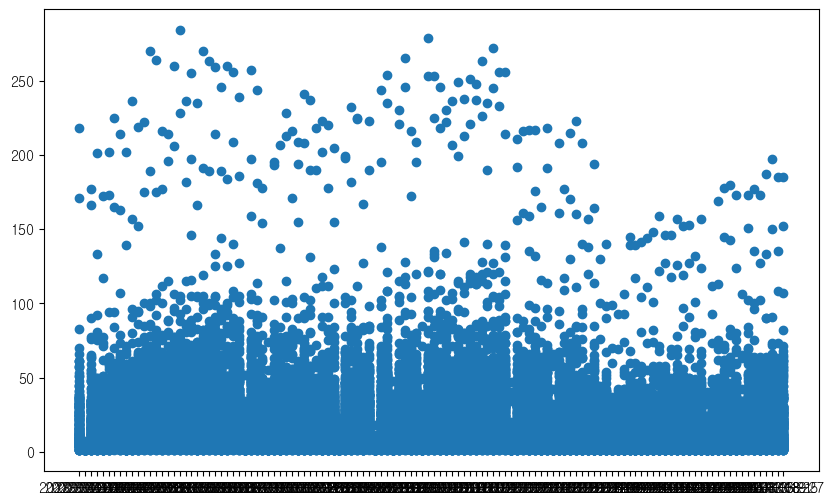

In [30]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(출근대여['기준_날짜'], 출근대여['전체_건수'])

In [32]:
import plotly.express as px

fig = px.scatter(x = 출근대여['기준_날짜'], y = 출근대여['전체_건수'])

fig.show()

In [33]:
출퇴근_이용량_통합 = pd.read_csv('./결과물/출퇴근_이용량_통합.csv',encoding='utf-8')
출퇴근_이용량_통합

,Unnamed: 0,대여소_ID,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,최종용도
0,0,ST-1062,3743,2281,1462,1462,6024,3947,5456,-1509,1509,9403,15427,주거
1,1,ST-1063,5029,8839,-3810,3810,13868,5795,3170,2625,2625,8965,22833,상업
2,2,ST-1064,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,상업
3,3,ST-1065,5860,5507,353,353,11367,14431,16569,-2138,2138,31000,42367,주거
4,4,ST-1067,3394,2906,488,488,6300,2666,3654,-988,988,6320,12620,주거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,ST-831,2756,1529,1227,1227,4285,3970,4425,-455,455,8395,12680,주거
191,191,ST-834,3297,4316,-1019,1019,7613,6179,6293,-114,114,12472,20085,주거
192,192,ST-835,4264,2058,2206,2206,6322,5461,7917,-2456,2456,13378,19700,주거
193,193,ST-975,2954,2508,446,446,5462,7355,8050,-695,695,15405,20867,주거


In [79]:
상업대여소 = 출퇴근_이용량_통합[출퇴근_이용량_통합['최종용도'] == '상업']

In [80]:
len(상업대여소['대여소_ID'])

66

In [81]:
상업지구출근대여 = 출근대여[출근대여['시작_대여소_ID'].isin(상업대여소['대여소_ID'])]

In [82]:
상업지구출근대여.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 1 to 21469
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기준_날짜      7002 non-null   object
 1   시작_대여소_ID  7002 non-null   object
 2   전체_건수      7002 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 218.8+ KB


In [83]:
# 상업지구출근대여['기준_날짜'] = pd.to_datetime(상업지구출근대여['기준_날짜'])

In [84]:
상업지구출근대여.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 1 to 21469
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기준_날짜      7002 non-null   object
 1   시작_대여소_ID  7002 non-null   object
 2   전체_건수      7002 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 218.8+ KB


In [85]:
상업지구출근대여

,기준_날짜,시작_대여소_ID,전체_건수
1,2023-04-03,ST-1063,61
2,2023-04-03,ST-1064,34
6,2023-04-03,ST-1249,45
7,2023-04-03,ST-1250,4
9,2023-04-03,ST-1252,1
...,...,...,...
21451,2024-03-27,ST-3259,1
21452,2024-03-27,ST-3260,4
21453,2024-03-27,ST-3261,8
21464,2024-03-27,ST-516,31


In [86]:
import plotly.express as px

fig = px.scatter(x = 상업지구출근대여['기준_날짜'], y = 상업지구출근대여['전체_건수'])

fig.show()

100을 기준으로 두그룹으로 나눠보자

In [87]:
temp100low = 상업지구출근대여[상업지구출근대여['전체_건수'] <= 100]

In [88]:
fig = px.scatter(x = temp100low['기준_날짜'], y = temp100low['전체_건수'])

fig.show()

In [89]:
temp100high = 상업지구출근대여[상업지구출근대여['전체_건수'] >= 100]

In [90]:
temp100high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 56 to 21359
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기준_날짜      104 non-null    object
 1   시작_대여소_ID  104 non-null    object
 2   전체_건수      104 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [91]:
fig = px.scatter(x = temp100high['기준_날짜'], y = temp100high['전체_건수'])

fig.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U10'), dtype('float64')) -> None

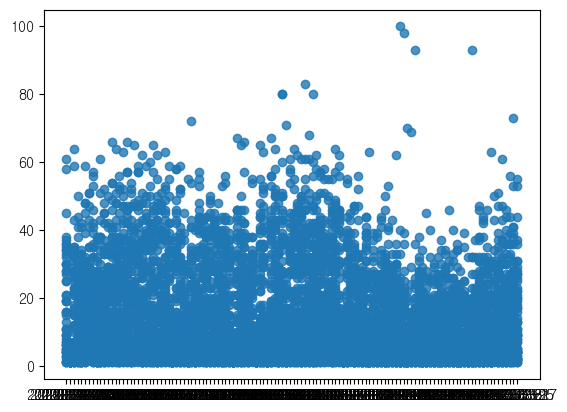

In [95]:
import seaborn as sns

ax = sns.regplot(x = '기준_날짜', y = '전체_건수', data=temp100low)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U10'), dtype('float64')) -> None

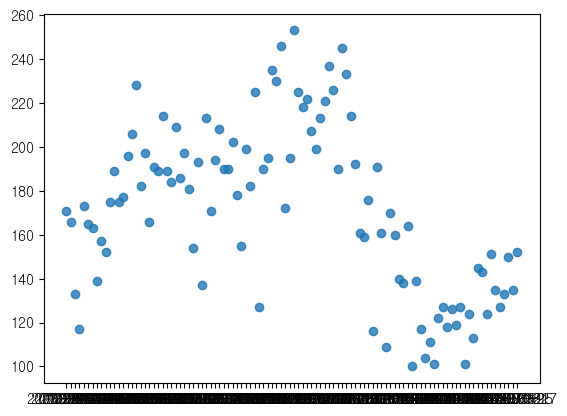

In [92]:
import seaborn as sns

ax = sns.regplot(x = '기준_날짜', y = '전체_건수', data=temp100high)

ValueError: could not convert string to float: '2023-04-03'

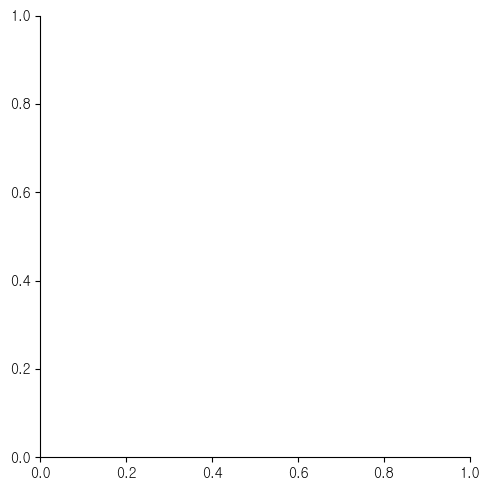

In [96]:
ax = sns.lmplot(x = '기준_날짜', y = '전체_건수', data=temp100high)